In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
# Load the dataset
data = pd.read_excel('data/energy.xlsx')

# Split the data into features (X) and target (y)


X = data.drop(columns=['Qe'])
X1 = data[['T20', 'phi', 'COP']]
X2 = data[['T20', 'phi', 'COP', 'mu', 'effd', 'effa']]
y = data['Qe']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (optional for Random Forest but recommended for consistency)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shapes of the training and testing sets
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)


(7008, 9) (1752, 9) (7008,) (1752,)


In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the Random Forest model structure
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=32, warm_start=True)

# Initialize lists to store metrics
train_losses = []
val_losses = []
train_maes = []
val_maes = []

# Custom training loop
n_epochs = 100
for epoch in range(1, n_epochs + 1):
    rf_model.n_estimators = epoch  # Increment the number of trees
    rf_model.fit(X_train_scaled, y_train)  # Fit the model

    # Predictions
    y_train_pred = rf_model.predict(X_train_scaled)
    y_val_pred = rf_model.predict(X_test_scaled)

    # Calculate loss and MAE
    train_loss = mean_squared_error(y_train, y_train_pred)
    val_loss = mean_squared_error(y_test, y_val_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_test, y_val_pred)

    # Store metrics
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_maes.append(train_mae)
    val_maes.append(val_mae)

    # Print metrics for the epoch
    print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Train MAE = {train_mae:.4f}, "
          f"Val Loss = {val_loss:.4f}, Val MAE = {val_mae:.4f}")


Epoch 1: Train Loss = 0.0000, Train MAE = 0.0005, Val Loss = 0.0000, Val MAE = 0.0007
Epoch 2: Train Loss = 0.0000, Train MAE = 0.0005, Val Loss = 0.0000, Val MAE = 0.0006
Epoch 3: Train Loss = 0.0000, Train MAE = 0.0005, Val Loss = 0.0000, Val MAE = 0.0006
Epoch 4: Train Loss = 0.0000, Train MAE = 0.0005, Val Loss = 0.0000, Val MAE = 0.0006
Epoch 5: Train Loss = 0.0000, Train MAE = 0.0004, Val Loss = 0.0000, Val MAE = 0.0006
Epoch 6: Train Loss = 0.0000, Train MAE = 0.0004, Val Loss = 0.0000, Val MAE = 0.0006
Epoch 7: Train Loss = 0.0000, Train MAE = 0.0004, Val Loss = 0.0000, Val MAE = 0.0006
Epoch 8: Train Loss = 0.0000, Train MAE = 0.0004, Val Loss = 0.0000, Val MAE = 0.0006
Epoch 9: Train Loss = 0.0000, Train MAE = 0.0004, Val Loss = 0.0000, Val MAE = 0.0006
Epoch 10: Train Loss = 0.0000, Train MAE = 0.0004, Val Loss = 0.0000, Val MAE = 0.0006
Epoch 11: Train Loss = 0.0000, Train MAE = 0.0004, Val Loss = 0.0000, Val MAE = 0.0006
Epoch 12: Train Loss = 0.0000, Train MAE = 0.0004, V

In [48]:
import joblib

# Save the model
joblib.dump(rf_model, 'models/rf_model-M3.joblib')


['models/rf_model-M3.joblib']

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
y_pred_rf = rf_model.predict(X_test_scaled)
y_train_pred_rf = rf_model.predict(X_train_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'MSE: {mse_rf}, R²: {r2_rf}')


MSE: 1.7187366375987335e-06, R²: 0.9999812509449663


R (Correlation coefficient): 1.0000
R²: 1.0000
MSE: 0.0000
RMSE: 0.0013
MAE: 0.0006


C:\Users\binwa\AppData\Local\Temp\ipykernel_52184\3904818147.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['MSE', 'RMSE', 'MAE'], y=[mse_rf, rmse_rf, mae_rf], palette='Blues_d')


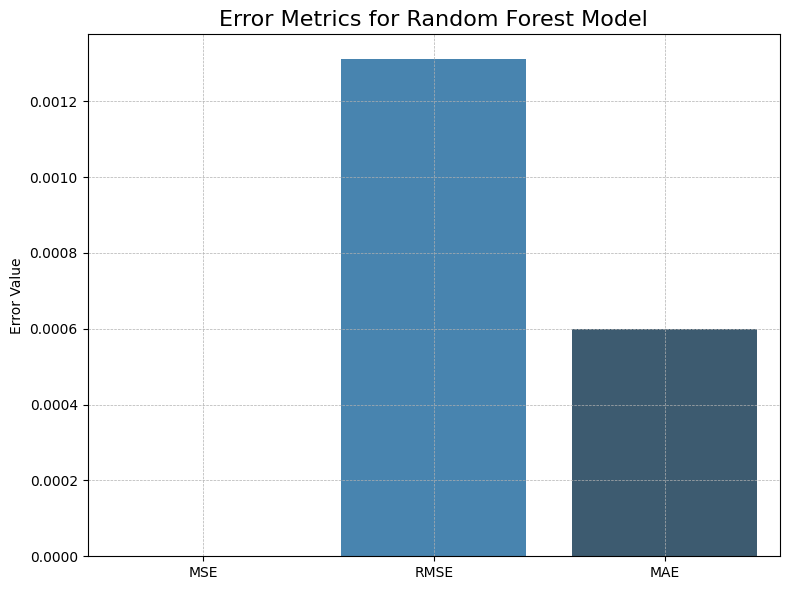

C:\Users\binwa\AppData\Local\Temp\ipykernel_52184\3904818147.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['R', 'R²'], y=[R_rf, r2_rf], palette='Greens_d')


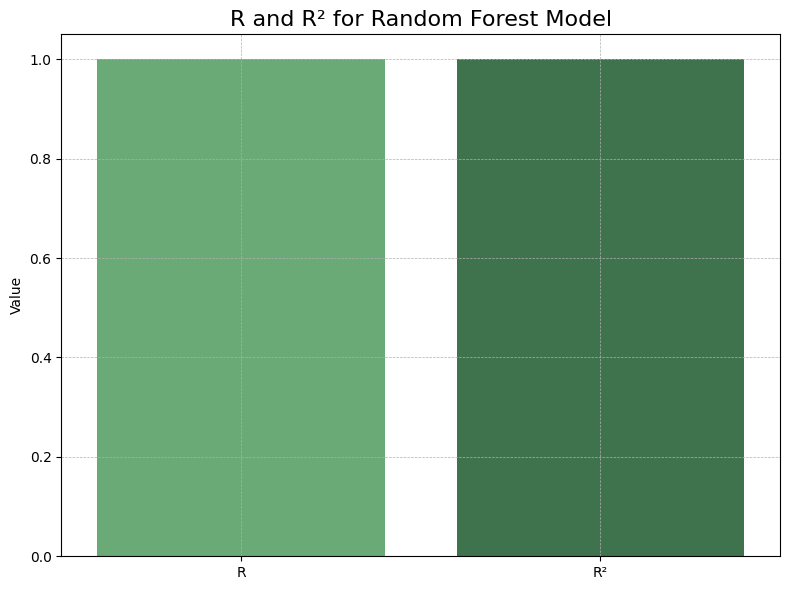

In [50]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

y_pred_rf = rf_model.predict(X_test_scaled)
y_train_pred_rf = rf_model.predict(X_train_scaled)

# Calculate R (Correlation coefficient)
correlation_matrix = np.corrcoef(y_test, y_pred_rf.flatten())
R_rf = correlation_matrix[0, 1]

# Calculate R²
r2_rf = r2_score(y_test, y_pred_rf)

# Calculate MSE
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate RMSE
rmse_rf = np.sqrt(mse_rf)

# Calculate MAE
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Print the evaluation results
print(f'R (Correlation coefficient): {R_rf:.4f}')
print(f'R²: {r2_rf:.4f}')
print(f'MSE: {mse_rf:.4f}')
print(f'RMSE: {rmse_rf:.4f}')
print(f'MAE: {mae_rf:.4f}')

# Create the results directory if it doesn't exist
os.makedirs('results', exist_ok=True)

# Create a DataFrame for the evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['R', 'R²', 'MSE', 'RMSE', 'MAE'],
    'Value': [R_rf, r2_rf, mse_rf, rmse_rf, mae_rf]
})

# Save the metrics to an Excel file
metrics_df.to_excel('results/M3-rf_evaluation_metrics.xlsx', index=False)

# Plot errors (MSE, RMSE, MAE)
plt.figure(figsize=(8, 6))
sns.barplot(x=['MSE', 'RMSE', 'MAE'], y=[mse_rf, rmse_rf, mae_rf], palette='Blues_d')
plt.title('Error Metrics for Random Forest Model', fontsize=16)
plt.ylabel('Error Value')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save the plot
plt.savefig('results/M3-rf_error_metrics_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot R and R²
plt.figure(figsize=(8, 6))
sns.barplot(x=['R', 'R²'], y=[R_rf, r2_rf], palette='Greens_d')
plt.title('R and R² for Random Forest Model', fontsize=16)
plt.ylabel('Value')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save the plot
plt.savefig('results/M3-rf_r_r2_plot.png', dpi=300, bbox_inches='tight')
plt.show()


In [51]:
# Export actual vs. predicted values to CSV and Excel files
results_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
results_train_rf = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred_rf})



# Save to Excel
results_rf.to_excel('results/M3-actual_vs_predicted_test_rf.xlsx', index=False)
results_train_rf.to_excel('results/M3-actual_vs_predicted_train_rf.xlsx', index=False)


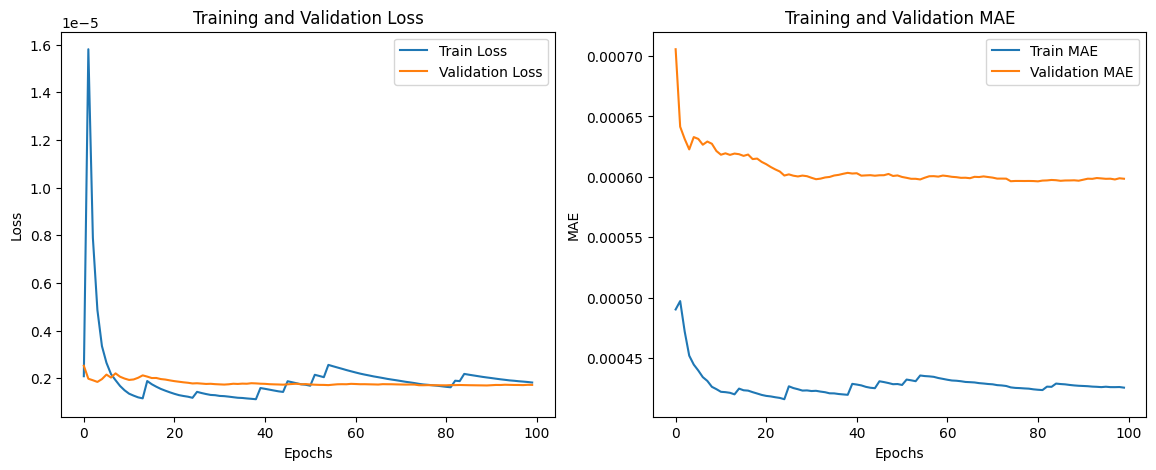

In [52]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation MAE
plt.subplot(1, 2, 2)
plt.plot(train_maes, label='Train MAE')
plt.plot(val_maes, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation MAE')
plt.savefig('results/M3-rf_loss-mae_plot.png', dpi=300, bbox_inches='tight')
plt.show()


In [53]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f'Mean Absolute Error: {mae_rf}')


Mean Absolute Error: 0.0005984588452167546


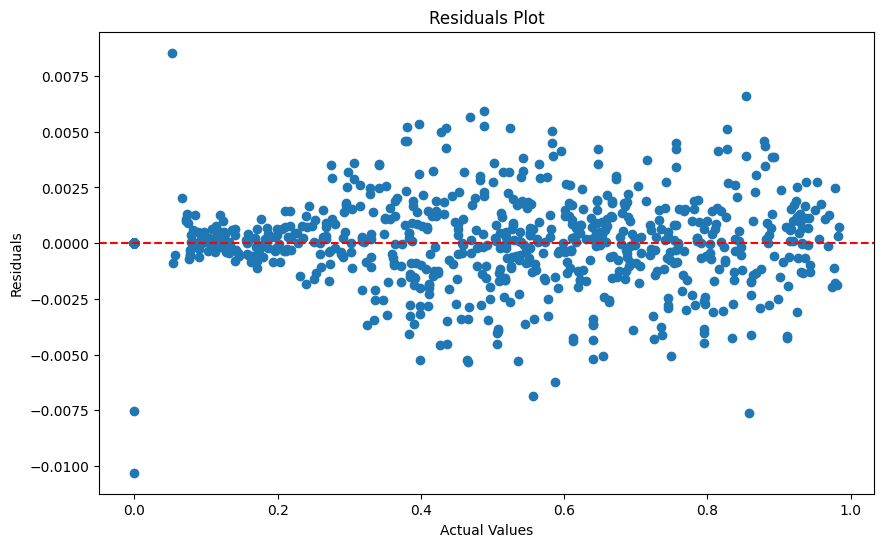

In [54]:
# Plot residuals
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.savefig('results/M3-rf_resedual_plot.png', dpi=300, bbox_inches='tight')
plt.show()


In [55]:
import shap
import matplotlib.pyplot as plt


# Explain the model predictions using SHAP
explainer_rf = shap.Explainer(rf_model)
shap_values_rf = explainer_rf(X_test_scaled)

# Plot SHAP summary and save the plot
plt.figure()
shap.summary_plot(shap_values_rf, X_test, feature_names=X.columns, show=False)  # `show=False` to prevent immediate display

# Save the SHAP summary plot to a file
plt.savefig('results/M3-rf_shap_summary_plot.png', dpi=300, bbox_inches='tight')
plt.close()  # Close the plot to avoid displaying it if running in a script
